<a href="https://colab.research.google.com/github/uneiz1103/global-cancer-eda-inferential-analysis/blob/main/EDA_and_Inferential_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zahidmughal2343/global-cancer-patients-2015-2024")

data_path = os.path.join(path, 'global_cancer_patients_2015_2024.csv')
data = pd.read_csv(data_path)

print(data.head())

100%|██████████| 1.20M/1.20M [00:00<00:00, 73.3MB/s]

Extracting files...


  Patient_ID  Age  Gender Country_Region  Year  Genetic_Risk  Air_Pollution  \
0  PT0000000   71    Male             UK  2021           6.4            2.8   
1  PT0000001   34    Male          China  2021           1.3            4.5   
2  PT0000002   80    Male       Pakistan  2023           7.4            7.9   
3  PT0000003   40    Male             UK  2015           1.7            2.9   
4  PT0000004   43  Female         Brazil  2017           5.1            2.8   

   Alcohol_Use  Smoking  Obesity_Level Cancer_Type Cancer_Stage  \
0          9.5      0.9            8.7        Lung    Stage III   
1          3.7      3.9            6.3    Leukemia      Stage 0   
2          2.4      4.7            0.1      Breast     Stage II   
3          4.8      3.5            2.7       Colon      Stage I   
4          2.3      6.7            0.5        Skin    Stage III   

   Treatment_Cost_USD  Survival_Years  Target_Severity_Score  
0            62913.44             5.9                   4.9

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [5]:
data.duplicated().sum()

np.int64(0)

# Descriptive analysis

#Age

In [6]:
data['Age']

,Age
0,71
1,34
2,80
3,40
4,43
...,...
49995,80
49996,40
49997,74
49998,21


In [7]:
data.shape

(50000, 15)

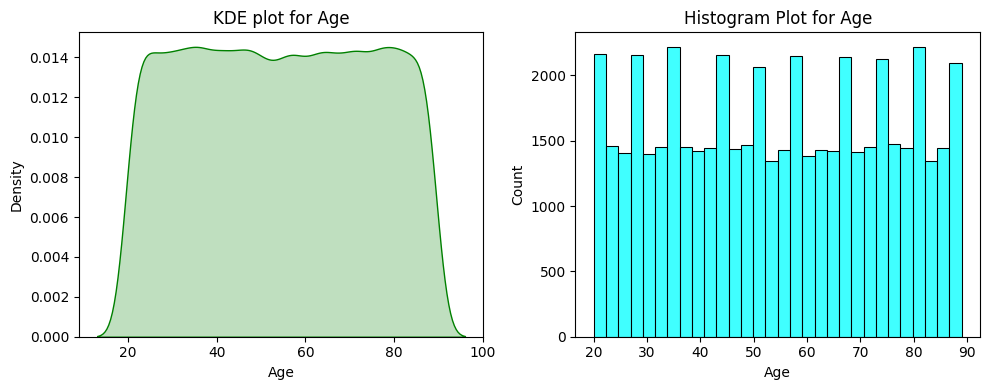

In [8]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.kdeplot(data['Age'], fill = True, color='green')
plt.title("KDE plot for Age")

plt.subplot(1,2,2)
sns.histplot(data['Age'], bins = 30, kde=False, color= "cyan")
plt.title("Histogram Plot for Age")

plt.tight_layout()
plt.show()

In [9]:
data['Age'].describe()

,Age
count,50000.000000
mean,54.421540
std,20.224451
min,20.000000
25%,37.000000
50%,54.000000
75%,72.000000
max,89.000000


#Gender


In [10]:
data['Gender'].value_counts()

,count
Gender,
Male,16796
Female,16709
Other,16495


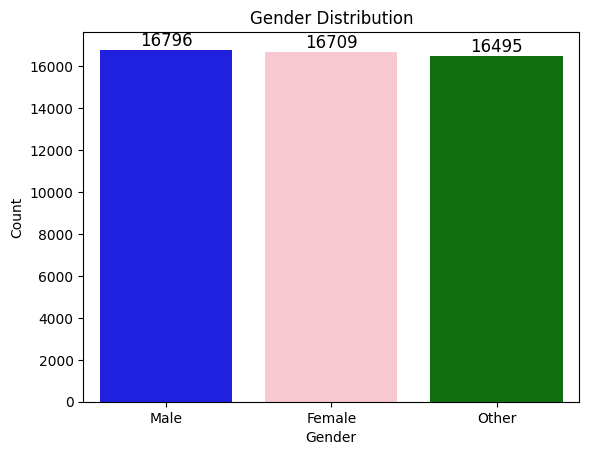

In [11]:
sns.barplot(x = data['Gender'].value_counts().index,
            y = data['Gender'].value_counts().values,
            palette = ['blue', 'pink', 'green']
            )

for i, v in enumerate(data['Gender'].value_counts()):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=12)


plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

#Countries

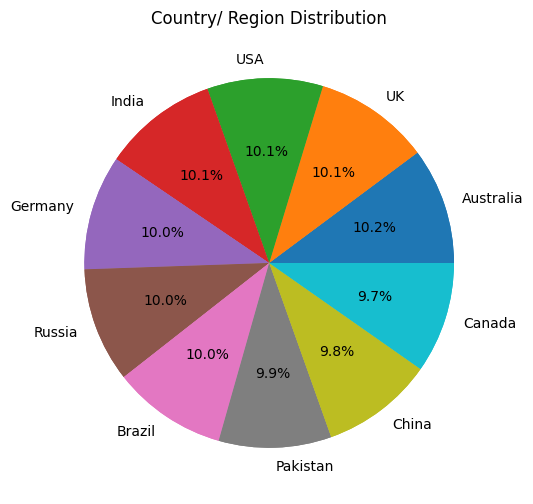

In [12]:
country_counts = data['Country_Region'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(x=country_counts.values,
        labels= country_counts.index,
        autopct= '%1.1f%%')

plt.pie(x=country_counts.values)

plt.title("Country/ Region Distribution")
plt.show()

Patients comes from 10 different countries/regions, with Australia being the most represented (5,092 patients). Number of data points for each country is almost same.

This diversity enables cross-country comparison of cancer outcomes and treatment economic.


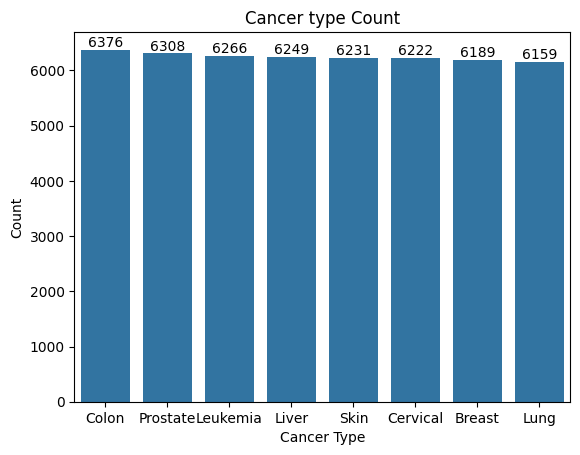

In [13]:
# Cancer Type
data['Cancer_Type'].value_counts()

sns.barplot(x = data['Cancer_Type'].value_counts().index,
            y = data['Cancer_Type'].value_counts().values,
            )

for i, v in enumerate(data['Cancer_Type'].value_counts()):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.title("Cancer type Count")
plt.xlabel("Cancer Type")
plt.ylabel("Count")
plt.show()

We have in total 8 types of cancer, with each cancer having approx. same number of data points under the label, most common cancers are colon cancer followed by prostate cancer.

# Cancer State

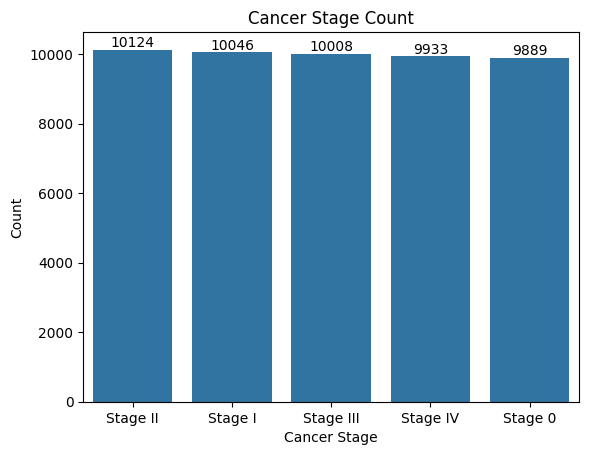

In [14]:
# Cancer Type
data['Cancer_Stage'].value_counts()

sns.barplot(x = data['Cancer_Stage'].value_counts().index,
            y = data['Cancer_Stage'].value_counts().values,
            )

for i, v in enumerate(data['Cancer_Stage'].value_counts()):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.title("Cancer Stage Count")
plt.xlabel("Cancer Stage")
plt.ylabel("Count")
plt.show()

Cancer Stage have 5 stages with values ranging from 0 to 4, with stage 2 the most common one, and each stage have same number of data.

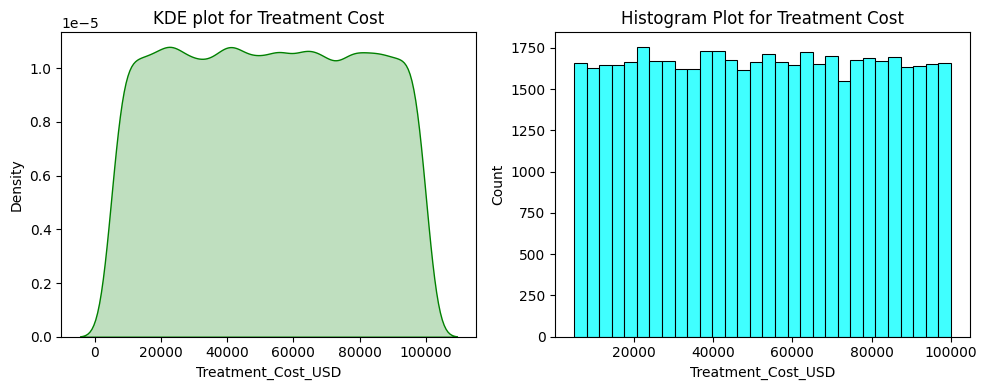

In [15]:
# Plotting for treatment cost

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.kdeplot(data['Treatment_Cost_USD'], fill = True, color='green')
plt.title("KDE plot for Treatment Cost")

plt.subplot(1,2,2)
sns.histplot(data['Treatment_Cost_USD'], bins = 30, kde=False, color= "cyan")
plt.title("Histogram Plot for Treatment Cost")

plt.tight_layout()
plt.show()

In [16]:
data['Treatment_Cost_USD'].describe()

,Treatment_Cost_USD
count,50000.000000
mean,52467.298239
std,27363.229379
min,5000.050000
25%,28686.225000
50%,52474.310000
75%,76232.720000
max,99999.840000


Treatment Cost USD have no skewness, and there are almost same number of data points under each bin as observed by histogram  

# ANALYZING THE RISK FACTORS

In [17]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

In [18]:
columns_of_interest = ['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']

summary = data[columns_of_interest].agg(["mean", "std", "min", "max"])
summary

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level
mean,5.001698,5.010126,5.010880,4.989826,4.991176
std,2.885773,2.888399,2.888769,2.881579,2.894504
min,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


These variables have nearly identical means and standard deviations, indicating they were likely designed on the same standardized scale. They are essential in studying interaction effects (e.g., genetic risk  x  Smoking) on survival.

# Determine the relationship between risk factors and cancer severity

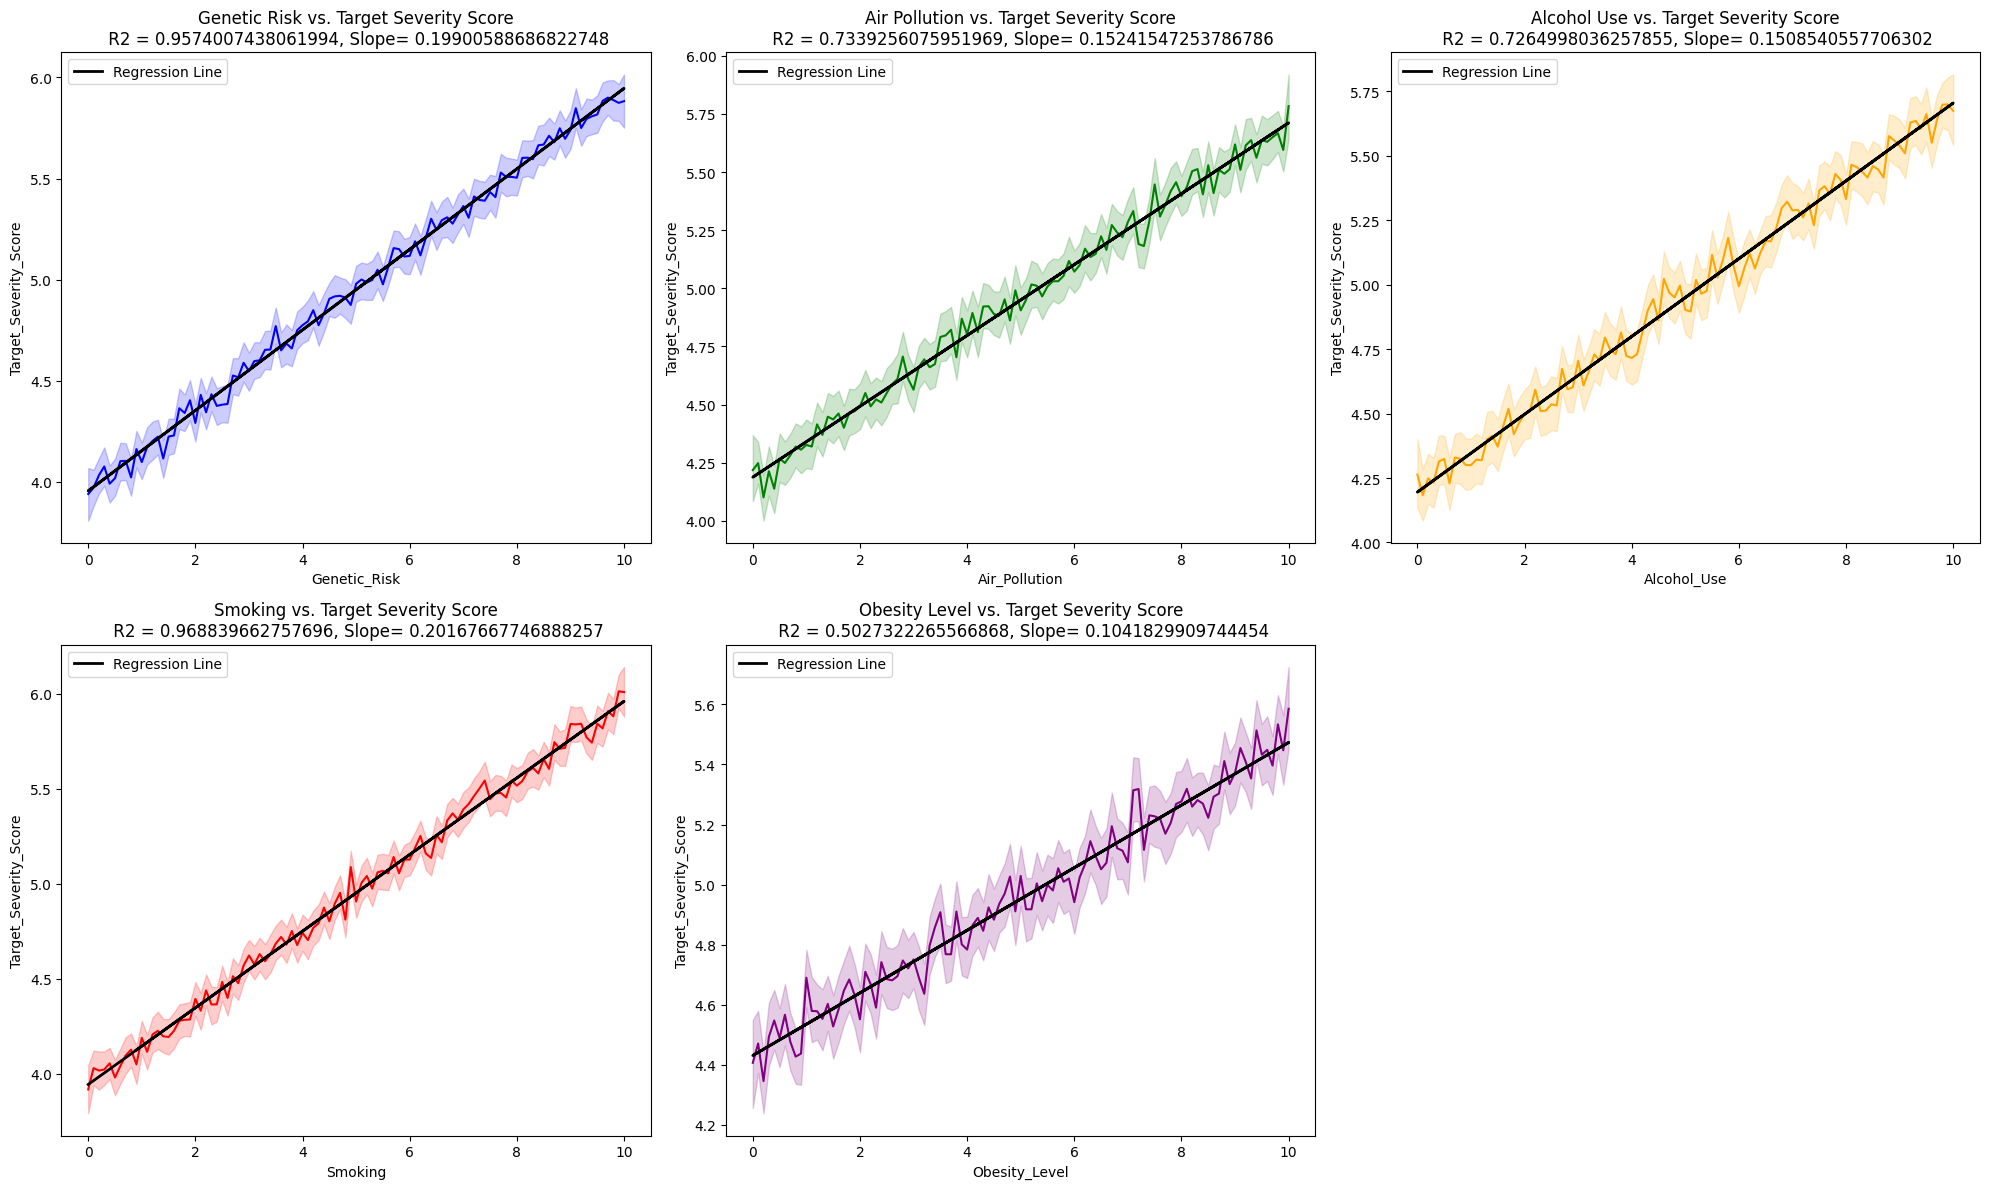

In [19]:
from scipy.stats import linregress

risk_factors = ['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']
titles = ['Genetic Risk', 'Air Pollution', 'Alcohol Use', 'Smoking', 'Obesity Level']
colors = ["blue", "green", "orange", "red", "purple"]

plt.figure(figsize=(20, 12))

for i , (factor, title, color) in enumerate(zip(risk_factors, titles, colors), 1):
  plt.subplot(2, 3, i)

  x = data[factor]
  y = data["Target_Severity_Score"]
  slope, intercept, r_value, p_value, std_err = linregress(x, y)

  r_squared = r_value * 2

  sns.lineplot(x=factor, y='Target_Severity_Score', data=data, color=color)
  plt.plot(x, slope * x + intercept, color="black", linewidth= 2, label = "Regression Line")
  plt.title(f"{title} vs. Target Severity Score\n R2 = {r_squared}, Slope= {slope}")
  plt.xlabel(factor)
  plt.ylabel("Target_Severity_Score")
  plt.legend()

# Line= y =mx+c

plt.tight_layout()
plt.show()


# Analyze the proporation of early-stage diagnoses by cancer type.

In [20]:
data["Cancer_Type"].unique()

array(['Lung', 'Leukemia', 'Breast', 'Colon', 'Skin', 'Cervical',
       'Prostate', 'Liver'], dtype=object)

In [21]:
stage_count = data[data['Cancer_Type'] == "Lung"] ["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get('Stage 0', 0)+ stage_count.get('Stage I', 0)
total_sum = stage_count.sum()
proportion= (early_stage_sum / total_sum) * 100
print(f"Proportion of lungs cancer diagnosed at stage 0 and stage 1 : {proportion}")

Proportion of lungs cancer diagnosed at stage 0 and stage 1 : 38.43156356551388


In [22]:
stage_count = data[data['Cancer_Type'] == "Leukemia"] ["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get('Stage 0', 0)+ stage_count.get('Stage I', 0)
total_sum = stage_count.sum()
proportion= (early_stage_sum / total_sum) * 100
print(f"Proportion of Leukemia cancer diagnosed at stage 0 and stage 1 : {proportion}")

Proportion of Leukemia cancer diagnosed at stage 0 and stage 1 : 39.53080114905841


In [23]:
stage_count = data[data['Cancer_Type'] == "Breast"] ["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get('Stage 0', 0)+ stage_count.get('Stage I', 0)
total_sum = stage_count.sum()
proportion= (early_stage_sum / total_sum) * 100
print(f"Proportion of Breast cancer diagnosed at stage 0 and stage 1 : {proportion}")

Proportion of Breast cancer diagnosed at stage 0 and stage 1 : 39.47325900791727


In [24]:
stage_count = data[data['Cancer_Type'] == "Colon"] ["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get('Stage 0', 0)+ stage_count.get('Stage I', 0)
total_sum = stage_count.sum()
proportion= (early_stage_sum / total_sum) * 100
print(f"Proportion of Colon cancer diagnosed at stage 0 and stage 1 : {proportion}")

Proportion of Colon cancer diagnosed at stage 0 and stage 1 : 40.41718946047679


In [25]:
stage_count = data[data['Cancer_Type'] == "Skin"] ["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get('Stage 0', 0)+ stage_count.get('Stage I', 0)
total_sum = stage_count.sum()
proportion= (early_stage_sum / total_sum) * 100
print(f"Proportion of Skin cancer diagnosed at stage 0 and stage 1 : {proportion}")

Proportion of Skin cancer diagnosed at stage 0 and stage 1 : 40.41084898090194


In [26]:
stage_count = data[data['Cancer_Type'] == "Cervical"] ["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get('Stage 0', 0)+ stage_count.get('Stage I', 0)
total_sum = stage_count.sum()
proportion= (early_stage_sum / total_sum) * 100
print(f"Proportion of Cervical cancer diagnosed at stage 0 and stage 1 : {proportion}")

Proportion of Cervical cancer diagnosed at stage 0 and stage 1 : 39.85856637737062


In [27]:
stage_count = data[data['Cancer_Type'] == "Prostate"] ["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get('Stage 0', 0)+ stage_count.get('Stage I', 0)
total_sum = stage_count.sum()
proportion= (early_stage_sum / total_sum) * 100
print(f"Proportion of Prostate cancer diagnosed at stage 0 and stage 1 : {proportion}")

Proportion of Prostate cancer diagnosed at stage 0 and stage 1 : 40.187064045656314


In [28]:
stage_count = data[data['Cancer_Type'] == "Liver"] ["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get('Stage 0', 0)+ stage_count.get('Stage I', 0)
total_sum = stage_count.sum()
proportion= (early_stage_sum / total_sum) * 100
print(f"Proportion of Liver cancer diagnosed at stage 0 and stage 1 : {proportion}")

Proportion of Liver cancer diagnosed at stage 0 and stage 1 : 40.614498319731155


# Identify Key Predictors of cancer severity and survival years.

In [29]:
features = ["Age", "Genetic_Risk", "Air_Pollution", "Alcohol_Use", "Smoking", "Obesity_Level"]
targets = ["Survival_Years", "Target_Severity_Score"]

# Calculate Correlations
pearson_corr = data[features + targets].corr(method="pearson")
spearman_corr = data[features + targets].corr(method="spearman")

# Slice out only the relationship with target variables
pearson_results = pearson_corr[targets]
spearman_results = spearman_corr[targets]

# Combine Both
correlation_df = pd.concat([pearson_results, spearman_results], axis=1, keys= ["Pearson", "Spearman"])

In [30]:
# random forest for target severity score

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# Converting categorical columns to numerical columns
categorical_cols = ['Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage']
for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# Preparing features and input
X = data.drop(columns=['Patient_ID', 'Survival_Years', 'Target_Severity_Score', 'Treatment_Cost_USD'])
y_severity = data["Target_Severity_Score"]

# train test split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y_severity, test_size=0.2, random_state=42)

#train the model
model_severity = RandomForestRegressor(n_estimators=200, max_depth= None, min_samples_split=2, min_samples_leaf=1, random_state=42)
model_severity.fit(X_train_s, y_train_s)

# evaluate the model
train_r2_severity = r2_score(y_train_s, model_severity.predict(X_train_s))
test_r2_severity = r2_score(y_test_s, model_severity.predict(X_test_s))


In [31]:
print(train_r2_severity)
print(test_r2_severity)

0.9689886894803543
0.7683892517466495


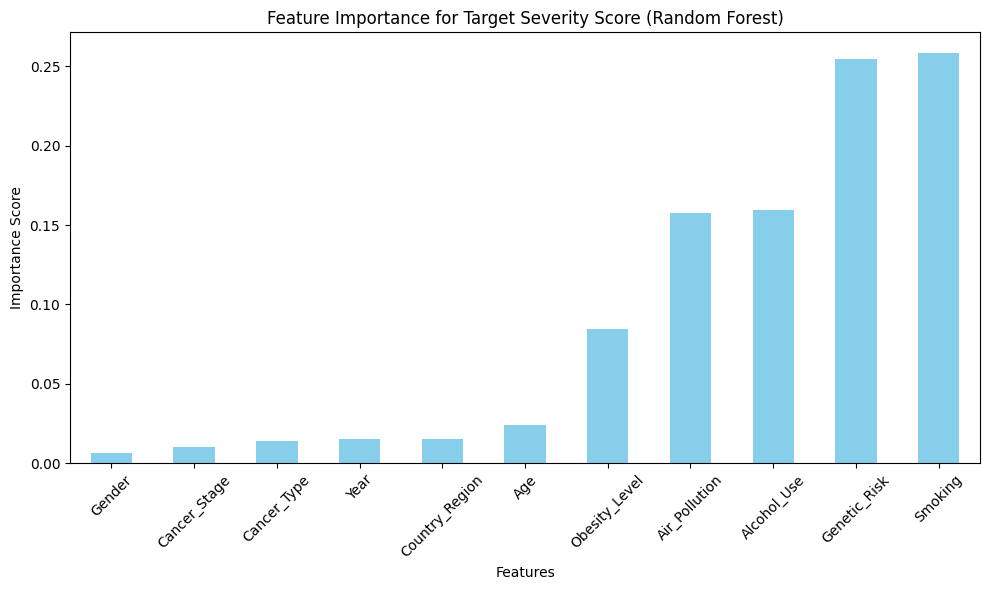

In [32]:
feature_importance_severity = pd.Series(
    model_severity.feature_importances_,
    index=X.columns,
).sort_values(ascending=True)

# Plotting of importance features
plt.figure(figsize=(10, 6))
feature_importance_severity.plot(kind="bar", color='skyblue')
plt.title("Feature Importance for Target Severity Score (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# random forest for target Survival score

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# Converting categorical columns to numerical columns
categorical_cols = ['Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage']
for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# Preparing features and input
X = data.drop(columns=['Patient_ID', 'Survival_Years', 'Target_Severity_Score', 'Treatment_Cost_USD'])
y_severity = data["Survival_Years"]

# train test split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y_severity, test_size=0.2, random_state=40)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2,]
}

#train the model
model = RandomForestRegressor(random_state=40)
GSC = GridSearchCV(model, param_grid, cv=3, scoring = 'r2', n_jobs = -1)
GSC.fit(X_train_s, y_train_s)

best_rf_severity = GSC.best_estimator_

# evaluate the model
train_r2_severity = r2_score(y_train_s, best_rf_severity.predict(X_train_s))
test_r2_severity  = r2_score(y_test_s, best_rf_severity.predict(X_test_s))


In [ ]:
print(train_r2_severity)
print(test_r2_severity)

In [ ]:
import seaborn as sns
sns.histplot(data['Survival_Years'], kde=True)
plt.show()

In [ ]:
data.corr(numeric_only=True)["Survival_Years"].sort_values(ascending=True)

Explore the economic burden of cancer treatment across different demographics and countries.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zahidmughal2343/global-cancer-patients-2015-2024")

data_path = os.path.join(path, 'global_cancer_patients_2015_2024.csv')
data = pd.read_csv(data_path)

In [ ]:
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 30, 45, 60, 75, 100], labels=['0-30', '31-45', '46-60', '61-75', '76+'])

In [ ]:
country_age_cost = data.groupby(['Country_Region', 'Age_Group', 'Gender'])['Treatment_Cost_USD'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=country_age_cost, x="Country_Region", y= "Treatment_Cost_USD", hue="Gender")
plt.xticks(rotation=90)
plt.title("Average Cancer Treatment Cost by Country and Gender")
plt.xlabel("Country")
plt.ylabel("Average Treatment Cost")
plt.show()

In [ ]:
country_age_cost = data.groupby(['Country_Region', 'Age_Group'])['Treatment_Cost_USD'].mean().reset_index()

In [ ]:
heatmap_data = country_age_cost.pivot(index='Age_Group', columns='Country_Region', values='Treatment_Cost_USD')

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt= ".0f")
plt.title("Average Treatment cost by age group and country")
plt.xlabel("Country")
plt.ylabel("Age Group")
plt.show()

Assess whether higher treatment cost is associated with longer survival

Null Hypothesis (Ho) :- There is no correlation between treatment cost and survival years.

Alternative Hypothesis (H1) :- There is a correlation (Positive or Negative) between treatment cost and survival years.

In [ ]:
from scipy.stats import pearsonr, spearmanr
x = data["Treatment_Cost_USD"]
y = data["Survival_Years"]

# performing pearson correlation test
pearson_corr, pearson_p =  pearsonr(x, y)
print(f"Pearson Correlation coefficient: {pearson_corr}")
print(f"Pearson P-value: {pearson_p}")

# Spearman correlation test
spearman_corr, spearman_p =  spearmanr(x, y)
print(f"spearman Correlation coefficient: {spearman_corr}")
print(f"spearman P-value: {spearman_p}")

alpha=0.05

def interpret_corr(corr, p, method):
  if p < alpha:
    print(f"{method}, we reject the null hypothesis")
  else:
    print(f"{method}, we fail to reject the null hypothesis")


interpret_corr(pearson_corr, pearson_p, "Pearson")
interpret_corr(spearman_corr, spearman_p, "Spearman")

In [ ]:
sns.regplot(x=x, y=y, line_kws={"color":"red"})
plt.show()

# Evaluate if higher cancer stages lead to greater treatment costs and reduced survival years

There is no relationship between Treatment cost and survival years.

In [ ]:
df = data.copy()

In [ ]:
stage_order = ['Stage 0', 'Stage I', 'Stage II', 'Stage III', 'Stage IV']

In [ ]:
grouped_stats = df.groupby("Cancer_Stage")[["Treatment_Cost_USD", "Survival_Years"]].mean().reset_index()

In [ ]:
grouped_stats

Treatment Cost vs. Cancer Stage


Null Hypothesis (Ho): The average treatment cost is the same across all cancer stages.

Alternative Hypothesis (H1): At least one stage has a different average cost.



Survival Years vs. Cancer Stage
Null Hypothesis (Ho): The average survival years are the same across all cancer stages.

Alternative Hypothesis (H1): At least one stage has a different survival duration.